<a href="https://colab.research.google.com/github/rachelcynthia/DeepLearning-Bootcamp/blob/master/Overfitting_Regularisation_and_Dropout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

Loading the Data

In [5]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

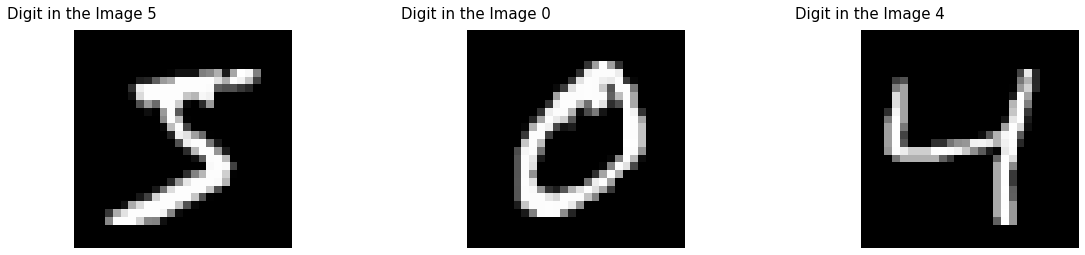

In [8]:
images = x_train[:3]
labels =y_train[:3]
f,ax = plt.subplots(nrows=1,ncols=3, figsize=(20,4))
for index,(img,ax) in enumerate(zip(images,ax)):
  ax.imshow(img,cmap='gray')
  ax.axis('off')
  ax.text(0.6,-2.0,f"Digit in the Image {labels[index]}",size=15,ha='center')
plt.show()

In [9]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import TensorBoard
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import regularizers
from datetime import datetime

Reshape the array

In [11]:
x_train = x_train.reshape(60000, 784)
x_test = x_test.reshape(10000, 784)

In [12]:
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

The model

In [13]:
model = Sequential()
model.add(Dense(10, activation='relu', input_shape= (784,) ))
model.add(Dropout(0.2)) #using dropout
model.add(Dense(256,activation='relu', kernel_regularizer = 'l2'))###using regularizer
model.add(Dropout(0.2)) #using dropout
model.add(Dense(256,activation='relu', kernel_regularizer = 'l2')) ###using regularizer
model.add(Dropout(0.2)) #using dropout
model.add(Dense(10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer=SGD(lr=0.001), metrics=['accuracy'])

Saving the model

In [14]:
logdir = "logs/" + datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=logdir)

es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=5)

In [16]:
training_history = model.fit(
    x_train, # input
    y_train, # output
    batch_size=32,
    verbose=1, 
    epochs=10,
    validation_data=(x_test, y_test),
    callbacks=[tensorboard_callback, es],
)

Epoch 1/10
   1/1875 [..............................] - ETA: 0s - loss: 25.8693 - accuracy: 0.1875WARNING:tensorflow:From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/summary_ops_v2.py:1277: stop (from tensorflow.python.eager.profiler) is deprecated and will be removed after 2020-07-01.
Instructions for updating:
use `tf.profiler.experimental.stop` instead.
1875/1875 [==============================] - 5s 2ms/step - loss: 4.8664 - accuracy: 0.1631 - val_loss: 4.6178 - val_accuracy: 0.2040
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 4.5693 - accuracy: 0.1844 - val_loss: 4.4168 - val_accuracy: 0.2080
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 4.3578 - accuracy: 0.2019 - val_loss: 4.1010 - val_accuracy: 0.2728
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 4.0865 - accuracy: 0.2461 - val_loss: 3.8877 - val_accuracy: 0.2881
Epoch 5/10
1875/1875 [==============================] - 4s 